In [1]:
%load_ext autoreload
%autoreload 2
# import sys, os
# sys.path.append('../')
# instead of sys can do .. in front of module
from app import db
from app.models import User, Project, ProjMember, JoinRequest, ScrumTask, Tag, Position, PROJ_CATEGORIES, \
                            Learning #Project subclasses
from app import create_app

app = create_app()
app.app_context().push()
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import umap
import matplotlib.pyplot as plt
import numpy as np

# Matching users with projects, and vice versa

Condensing projects, and users, into machine interpretable matrices.
 Recommended table schema

`USER_ID | PROJECT_ID | CATEGORY | RANK`

## Text data
* Projects
 - Description (string)
 - Tags (array of strings)
    
* Users
 - Interests (array)
 - About me/goals (string)
 - Should also incorporate liked/followed projects and other users
 
Content based filtering (2 approaches)
- Jaccard Index (non ML)
- Cosine Similarity (content embeddings) 
    - this is probably what will be used for the description strings as well
    
Users should have a relation table for whether or not project should show up in recommended
- False flag if user is already member, or if they click a 'hide recommendation' button
    - Hide recommendation can also have an option for "Not interested" as a label for models

[Great resource for this](https://github.com/JohnsonKuan/movie-rec-tags/blob/master/Movie-Rec-Movielens-Tags.ipynb)

# TODO
[pretrained models](https://radimrehurek.com/gensim/models/word2vec.html)

In [148]:
def prepare_data(model, id_, tags_only):
    """Prepare string data for semantic model
    maybe not necessary"""
    inst = model.query.get(id_)
    if model == Project:
        description = inst.descr
    else:
        description = inst.about_me
    return description #TAGS: {' '.join(tags)}"
    

    




In [49]:
usr = input().split(' ')

 python computer-programming data-science machine-learning physics math javascript


In [51]:
fake_projs = dict()
for i in range(10):
    fake_projs[i] =  input().split(' ')


 machine-learning software-engineering web-development
 data-science python pandas
 art painting nature
 sports analysis excel basketball
 books reading science-fiction
 science math analysis
 cooking food 
 javascript web-development apparel data-analysis
 hiking nature outdoor-activities
 deep-learning machine-learning data-science


In [54]:
fake_projs

{0: ['machine-learning', 'software-engineering', 'web-development'],
 1: ['data-science', 'python', 'pandas'],
 2: ['art', 'painting', 'nature'],
 3: ['sports', 'analysis', 'excel', 'basketball'],
 4: ['books', 'reading', 'science-fiction'],
 5: ['science', 'math', 'analysis'],
 6: ['cooking', 'food', ''],
 7: ['javascript', 'web-development', 'apparel', 'data-analysis'],
 8: ['hiking', 'nature', 'outdoor-activities'],
 9: ['deep-learning', 'machine-learning', 'data-science']}

In [154]:
print(cbf(usr, jaccard_index, fake_data=1))
print(cbf(usr, cosine_sim, model=mo ,fake_data=1))

[1, 9, 0, 5, 7, 2, 3, 4, 6, 8]
[9, 6, 7, 1, 5, 8, 0, 3, 4, 2]


# Doc2Vec

In [153]:
def train_model(max_epochs, vec_size, alpha, FAKE_DATA=0):
    """Trains Doc2Vec model to create content embedding on tags"""
    if not FAKE_DATA:
        projects = Project.query.all()
        users = User.query.all() #TODO have a include_users arg
        proj_tags =  [[t.name for t in p.tags] for p in projects] # assumes tags have clean format
    else:
        proj_tags = FAKE_DATA
    proj_tags_doc = [TaggedDocument(words=D, tags=[str(i)]) for i, D in enumerate(proj_tags)]
    
    model = Doc2Vec(vector_size=vec_size,
                   alpha=alpha,
                   min_alpha=.00025,
                   min_count=1,
                   dm=0)
    
    model.build_vocab(proj_tags_doc)
    for epoch in range(max_epochs):
        model.train(proj_tags_doc, total_examples=model.corpus_count, epochs=model.epochs)
        model.alpha -= .0002 #decrease LR
        model.min_alpha = model.alpha # fix LR w/o decay
        
    return model

mo= train_model(max_epochs=50, vec_size=3, alpha=.025, FAKE_DATA = list(fake_projs.values()).append(usr))

In [129]:
vectors = mo.docvecs.vectors_docs
vectors
lowd = umap.UMAP(n_neighbors=3, min_dist=.001, metric='cosine').fit_transform(vectors)

array([[ 0.41453287,  0.10771006, -0.5225251 ],
       [ 0.71531576, -0.38233927, -0.6245335 ],
       [ 0.54852635, -0.23875757, -0.61412114],
       [ 1.1464095 , -0.23747687, -0.7389227 ],
       [ 0.44399005, -0.17563416, -0.7286961 ],
       [ 0.5235246 , -0.28810576, -0.6174281 ],
       [ 0.79403895, -0.27898872, -0.7191566 ],
       [ 1.0502168 , -0.2077465 , -1.0158744 ],
       [ 0.7584385 , -0.3445291 , -0.46348628],
       [ 0.51693636, -0.13532563, -0.5862865 ]], dtype=float32)

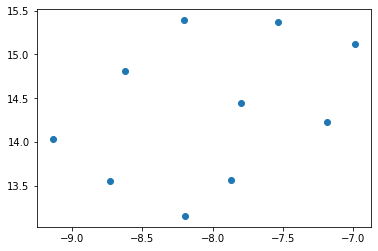

In [124]:
x, y = lowd.T[0], lowd.T[1]
plt.scatter(x,y)

In [40]:

def f(fun):
    f1= lambda x:x+1
    
    s = 3
    x=locals()[fun](s)
    return x
    
f('f1')

def x():
x    ""

In [53]:
class Mixin:
    def appender(self, l):
        for i in l:
            self.tags.append(i)
            
class A(Mixin):
    
    tags = []
    def uses_appender(self,l):
        self.appender(l)
        
    def x(self):
        self.uses_appender([1,2,3])
    
a = A()
a.uses_appender([1,2,3])
# a.x()
a.tags

[1, 2, 3]

In [59]:
x = {1:2, 3:4}
for k,v in x.items():
    print(k,v)

1 2
3 4


In [62]:
x = {'1':lambda a:a+1}
x['1'](2)

3

In [86]:
x=[1,2,3]
x.pop(0)
x

[2, 3]

In [88]:
'_'.join("asdasd eqwwe".split())

'asdasd_eqwwe'

In [90]:
x={1:2}
list(x.keys()) + [2]

[1, 2]

In [91]:
if 1:
    pass
    print(3)

3
